In [0]:
from google.colab import files
from zipfile import ZipFile 
import os
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show



In [2]:
files.upload()

Saving 30Stocks.zip to 30Stocks.zip


{'30Stocks.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x0f_\xaeN\xfd\xb1\x95\xbdY`\x00\x00)\xc9\x01\x00\x19\x00\x00\x0030Stocks/ADANIPORTS_L.csv\xad}\xdb\xae\xad\xbbm\xde}\x9eb\xc0@\xef\xba&$R\xc7K\xb7n\xd0\x06\x8d\x9d\xd4y\x81mg75\xe0f\x1b\x8e\x9d\xc2o_\xf2\x9fkH\xe2Gj-\xa3\xe84`{h\x8d\x03\xf9K\xe2\x99\x1f\x7f\xf6\xeb\xbf\xfc\xef\xdf\xfc\xf4\xfb\x9f\xfd\xc7\x9f\xfd\xfa\xc7?\xfe\xee\xc7\x7f\x93\xff\xf3\x8b\x1f\xfe\xf4\xa3\xfc\xcf?\xfc\xf1\xc7\x7f\x7f\xfd\xe7\xdf\xff\xf4o\xfa\xe2W\x7f\xf8\xf1__\xff\xf0\xc7\xdf\xfdV_\xfc\xd7\xdf\xfd\xcb\xffZ/\xfe\xfbO\xffg\xff\xff\x1f\xfe\xedO\xeb\xc5\xf3\xd1\xf5\xea\xe7\xff\xfe\xe3\x1f\x7f\xf8\x97\xfd\xfa\x9f~\xfa\xd3\x0f\xbf\x7f\xfd\xd3\x1f\x7f\xf8\xe7\x1f\xff\xf9\xf5\x8f\x7f\xfe\xe1_\xff\xf4\xbb?\xfdE\xd7\xff\xfc\xc7\x7f\xfdI\xde+\xff\xf7\x97?}\xbc~\xfa\x9f\x9f\xefy\xe8\xfa\xf1\xf7\xbf\xd3o\xf9\xcd\xef\x7f|\xfd\xe3\xf3\xe6\xff\xf0\xfa\xc5\xef\xff"\xff\xff\xf5\xa7\x9f\xd6W\xc9?\xfc\xcd\xcf~\xfe\x8b\x9f\xff\xf2\xbf\xfd\xc3\xaf\xfe\xc7?\xfdZ\xde\xf5_\xfeQ

In [0]:
file_name = "30Stocks.zip"

In [189]:
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 
path="30Stocks"
Stocks=[]
for r,d,f in os.walk(path):
  Stocks.append(f)

File Name                                             Modified             Size
30Stocks/ADANIPORTS_L.csv                      2019-05-14 11:56:30       117033
30Stocks/ADANIPOWER_M.csv                      2019-05-14 12:05:28       116797
30Stocks/AJANTPHARM_M.csv                      2019-05-14 12:05:36       116797
30Stocks/AMARAJABAT_M.csv                      2019-05-14 12:01:26       116797
30Stocks/APOLLOTYRE_M.csv                      2019-05-14 12:01:36       116797
30Stocks/ASHOKA_S.csv                          2019-05-14 12:12:22       114821
30Stocks/ASIANPAINT_L.csv                      2019-05-14 11:56:42       117033
30Stocks/AXISBANK_L.csv                        2019-05-14 11:56:50       116043
30Stocks/BAJAJELEC_S.csv                       2019-05-14 12:12:10       116303
30Stocks/BAJFINANCE_L.csv                      2019-05-14 11:57:00       117033
30Stocks/BERGEPAINT_M.csv                      2019-05-14 12:01:46       116797
30Stocks/BOMDYEING_S.csv                

In [0]:
StockClosePrice={}

In [191]:
Stocks[0][1][0:len(Stocks[0][1])-4]

'ADANIPOWER_M'

In [0]:
for i in range(0,30):
  temp=pd.read_csv('30Stocks/'+Stocks[0][i])
  StockClosePrice[Stocks[0][i][0:len(Stocks[0][i])-4]]=temp['Close Price'].iloc[0:251]

In [0]:
StockClosePrice=pd.DataFrame(StockClosePrice)

In [0]:
StockClosePrice.sort_index(inplace=True)

In [0]:
returns = StockClosePrice.pct_change().mean() * 252
returns = pd.DataFrame(returns)

In [0]:
returns.columns = ['Returns']
returns['Volatility'] = StockClosePrice.pct_change().std() * math.sqrt(252)

In [0]:
ModelData = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

## Elbow Curve

In [0]:
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

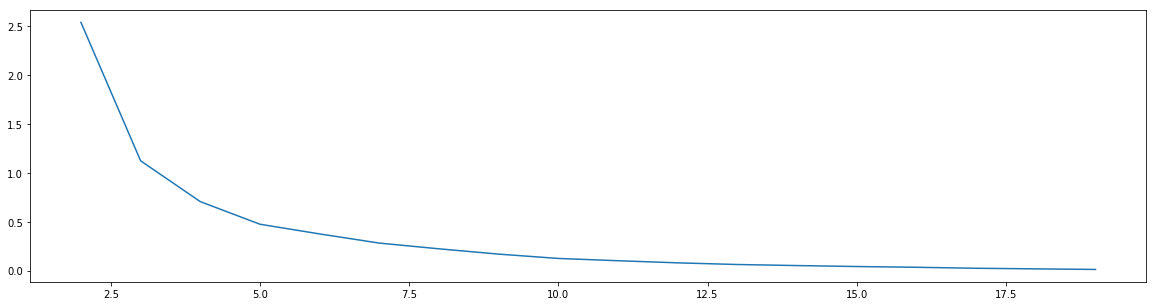

In [200]:
fig=plt.figure(figsize=(20,5))
plt.plot(range(2, 20), distorsions)

In [0]:
centroids,_ = kmeans(data,5)

In [0]:
idx,_ = vq(data,centroids)

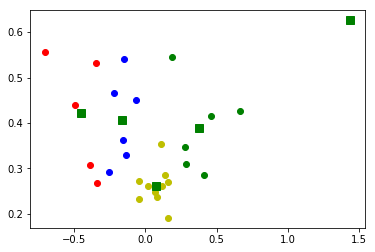

In [203]:
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

## Removing the outlier

In [204]:
returns.idxmax()

Returns       HDFC_L
Volatility    HDFC_L
dtype: object

In [0]:
returns.drop('HDFC_L',inplace=True)


In [210]:
returns.idxmax()

Returns       DHFL_M
Volatility    DHFL_M
dtype: object

In [0]:
returns.drop('DHFL_M',inplace=True)


In [0]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [0]:
x_points=[]
for i in range(0,5):
  points=list(data[idx==i,0])
  for j in range(0,len(points)):
    x_points.append(points[j])

y_points=[]
for i in range(0,5):
  points=list(data[idx==i,1])
  for j in range(0,len(points)):
    y_points.append(points[j])

NameError: ignored

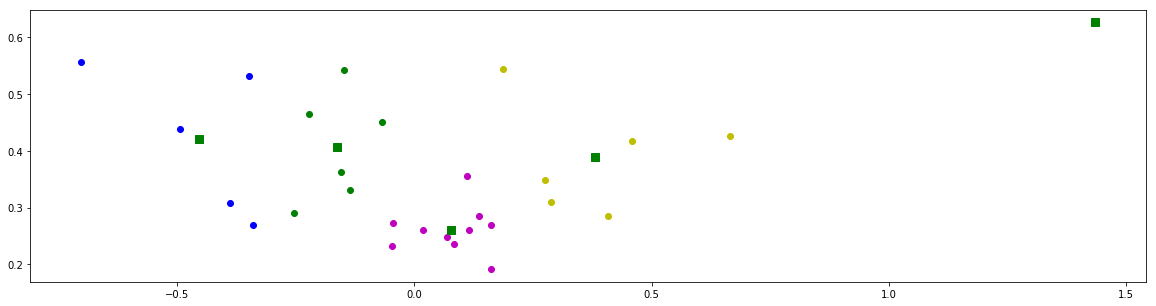

In [223]:
plt.figure(figsize=(20,5))
centroids,_ = kmeans(data,5)
idx,_ = vq(data,centroids)
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
for xy in zip(x_points,y_points):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
show()

In [218]:
returns.index

Index(['ASIANPAINT_L', 'ADANIPOWER_M', 'CENTURYPLY_S', 'EXIDEIND_M',
       'GUJALKALI_S', 'DRREDDY_L', 'GMRINFRA_M', 'FORTIS_S', 'ASHOKA_S',
       'AMARAJABAT_M', 'BPCL_L', 'BOMDYEING_S', 'AJANTPHARM_M', 'CASTROLIND_M',
       'EICHERMOT_L', 'JETAIRWAYS_S', 'BAJAJELEC_S', 'IRCON_S', 'CIPLA_L',
       'CUMMINSIND_M', 'ITDC_S', 'AXISBANK_L', 'BAJFINANCE_L', 'BERGEPAINT_M',
       'GAIL_L', 'ADANIPORTS_L', 'APOLLOTYRE_M', 'IDFC_S'],
      dtype='object')